# Load Data & Feature Selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv('/Users/yuhanliu/Desktop/ds1001/proj/wildfire.csv')
df.head()

/Users/yuhanliu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,...,A,40.036944,-121.005833,5,USFS,CA,63,63.0,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.933056,-120.404444,5,USFS,CA,61,61.0,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.984167,-120.735556,13,STATE OR PRIVATE,CA,17,17.0,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.559167,-119.913333,5,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.559167,-119.933056,5,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [9]:
cols = ['FIRE_YEAR','DISCOVERY_DOY', 'CONT_DOY', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'STAT_CAUSE_CODE','FIRE_SIZE_CLASS','STATE']
fire = df[cols]

In [10]:
fire['FIRE_YEAR'] = fire['FIRE_YEAR'].astype(str)+'/1/1'
fire['discover_date'] =  pd.to_datetime(fire['FIRE_YEAR']) + (fire['DISCOVERY_DOY'] - 1).map(dt.timedelta)
fire['duration'] = fire['CONT_DOY'] - fire['DISCOVERY_DOY']
fire['CONT_DOY'] = fire['CONT_DOY'].fillna(fire['DISCOVERY_DOY'] + np.mean(fire['duration']))
fire['duration'] = fire['duration'].fillna(np.mean(fire['duration']))
fire['discover_month'] = pd.DatetimeIndex(fire['discover_date']).month 

<ipython-input-10-20fcb1a68c48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire['FIRE_YEAR'] = fire['FIRE_YEAR'].astype(str)+'/1/1'
<ipython-input-10-20fcb1a68c48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire['discover_date'] =  pd.to_datetime(fire['FIRE_YEAR']) + (fire['DISCOVERY_DOY'] - 1).map(dt.timedelta)
<ipython-input-10-20fcb1a68c48>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
fire["FIRE_SIZE_CLASS"] = le.fit_transform(fire["FIRE_SIZE_CLASS"])

<ipython-input-11-149276d2e124>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire["FIRE_SIZE_CLASS"] = le.fit_transform(fire["FIRE_SIZE_CLASS"])


In [16]:
fire.head()


,FIRE_YEAR,DISCOVERY_DOY,CONT_DOY,LATITUDE,LONGITUDE,OWNER_CODE,STAT_CAUSE_CODE,FIRE_SIZE_CLASS,STATE,discover_date,duration,discover_month
0,2005/1/1,33,33.0,40.036944,-121.005833,5,9,0,CA,2005-02-02,0.0,2
1,2004/1/1,133,133.0,38.933056,-120.404444,5,1,0,CA,2004-05-12,0.0,5
2,2004/1/1,152,152.0,38.984167,-120.735556,13,5,0,CA,2004-05-31,0.0,5
3,2004/1/1,180,185.0,38.559167,-119.913333,5,1,0,CA,2004-06-28,5.0,6
4,2004/1/1,180,185.0,38.559167,-119.933056,5,1,0,CA,2004-06-28,5.0,6


<BarContainer object of 13 artists>

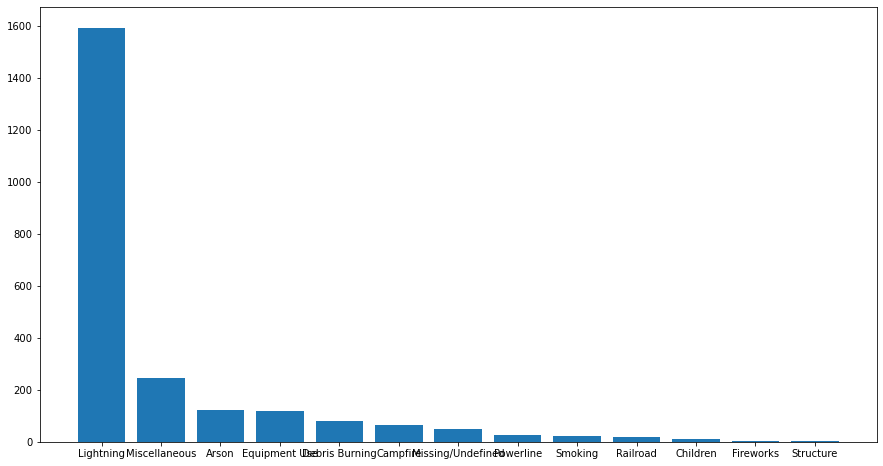

In [19]:
df['FIRE_SIZE_CLASS'] = le.fit_transform(df["FIRE_SIZE_CLASS"])
fire_G = df[df['FIRE_SIZE_CLASS'] == 6]
fire_G_count = pd.DataFrame(fire_G['STAT_CAUSE_DESCR'].value_counts()).reset_index()
plt.figure(figsize = (15, 8))
plt.bar(fire_G_count['index'],fire_G_count['STAT_CAUSE_DESCR'])

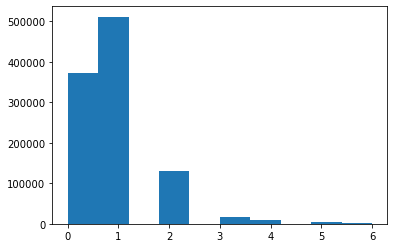

In [17]:
# distribution of fire size class
plt.hist(fire['FIRE_SIZE_CLASS'])
plt.xlabel('Fire size class')
plt.ylabel('Number of wildfires')
plt.title('Distribution of fire size class')
plt.show()

Text(0.5, 1.0, 'Number of wildfire in each state')

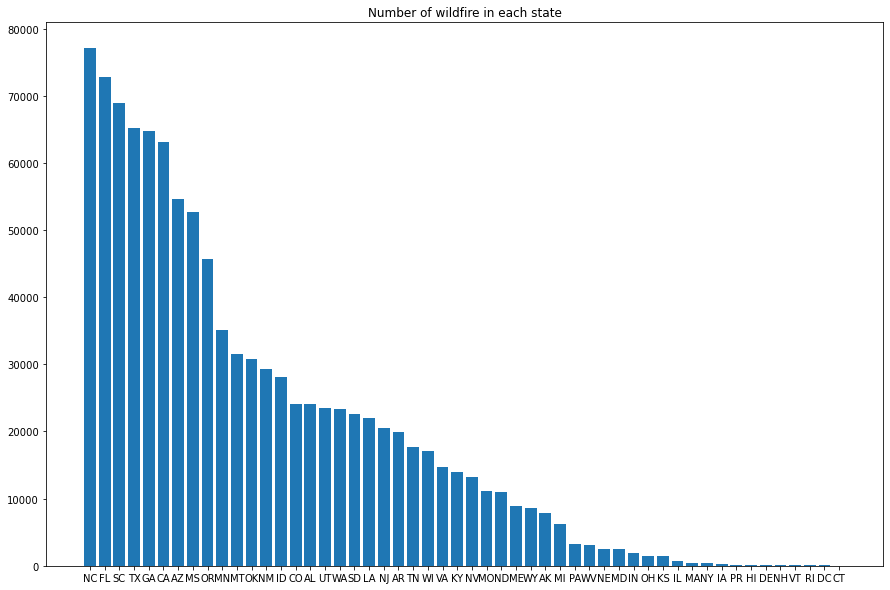

In [18]:
total_fire= fire.groupby('STATE')['duration'].count().sort_values(ascending=False) # CASES of wildfire by states
#California and Alaska not significant.
#NEEDS DISCUSSION
total_fire = pd.DataFrame(total_fire).reset_index()
plt.figure(figsize = (15,10))
plt.bar(total_fire['STATE'],total_fire['duration'])
plt.title('Number of wildfire in each state')

In [ ]:
fire_NC = fire[fire['STATE']=='NC']
plt.hist(fire_NC['FIRE_SIZE_CLASS'])

<ipython-input-19-2ccbf772a639>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire['level'] = fire.apply(lambda x: 0 if x['FIRE_SIZE_CLASS'] <=2 else 1, axis = 1)


Text(0.5, 1.0, 'Percentage of large wildfire in each state')

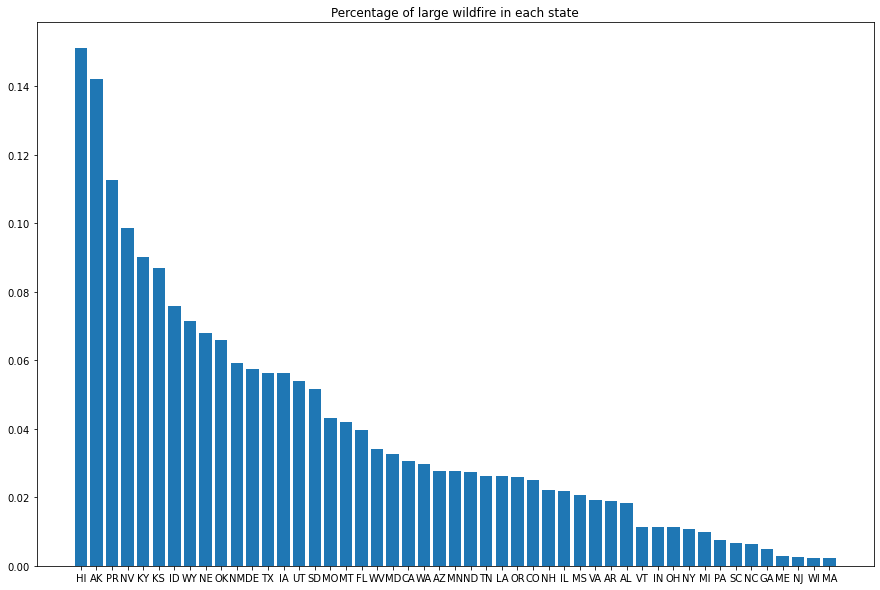

In [19]:
# percentage of large fire: class (3,4,5,6) for each state
fire['level'] = fire.apply(lambda x: 0 if x['FIRE_SIZE_CLASS'] <=2 else 1, axis = 1)
fire_count = fire.groupby(['STATE','level'])['duration'].count().reset_index()
fire_count = pd.DataFrame(fire_count).set_index('STATE')
fire_largecount = pd.DataFrame(fire_count[fire_count['level']==1]['duration'])
fire_totalcount = fire.groupby(['STATE'])['duration'].count().reset_index()
f = pd.merge(fire_totalcount,fire_largecount,left_on = 'STATE',right_index = True)
f['percentage'] = f['duration_y']/f['duration_x']
perc_rank = f.loc[:,['STATE','percentage']].sort_values('percentage',ascending=False)
plt.figure(figsize = (15,10))
plt.bar(perc_rank['STATE'],perc_rank['percentage'])
plt.title('Percentage of large wildfire in each state')

Text(0.5, 1.0, 'Percentage of large wildfire in each state')

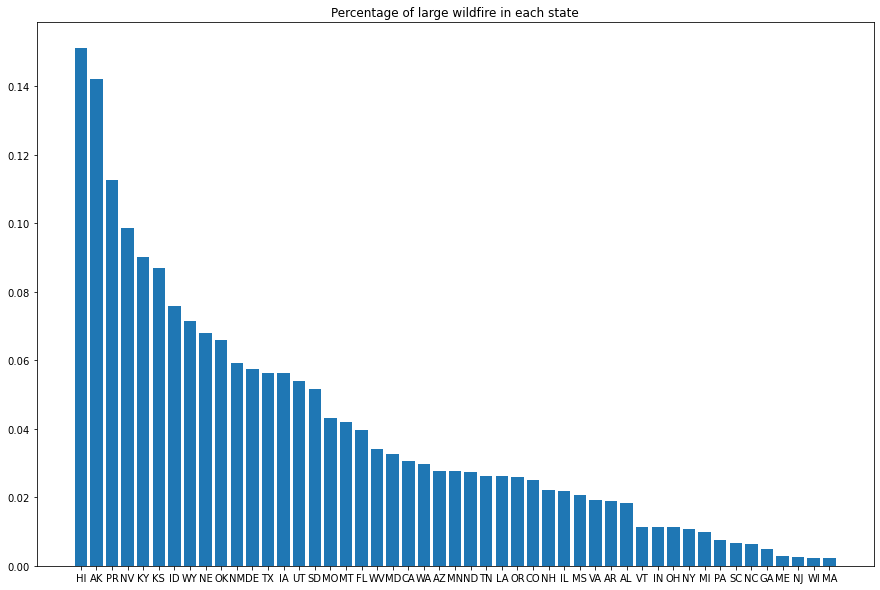

In [10]:
#fire.groupby('STATE')['level'].count()
fire_count = fire.groupby(['STATE','level'])['duration'].count().reset_index()
fire_count = pd.DataFrame(fire_count).set_index('STATE')
fire_largecount = pd.DataFrame(fire_count[fire_count['level']==1]['duration'])
fire_totalcount = fire.groupby(['STATE'])['duration'].count().reset_index()
f = pd.merge(fire_totalcount,fire_largecount,left_on = 'STATE',right_index = True)
f['percentage'] = f['duration_y']/f['duration_x']
perc_rank = f.loc[:,['STATE','percentage']].sort_values('percentage',ascending=False)

plt.figure(figsize = (15,10))
plt.bar(perc_rank['STATE'],perc_rank['percentage'])
plt.title('Percentage of large wildfire in each state')

<BarContainer object of 49 artists>

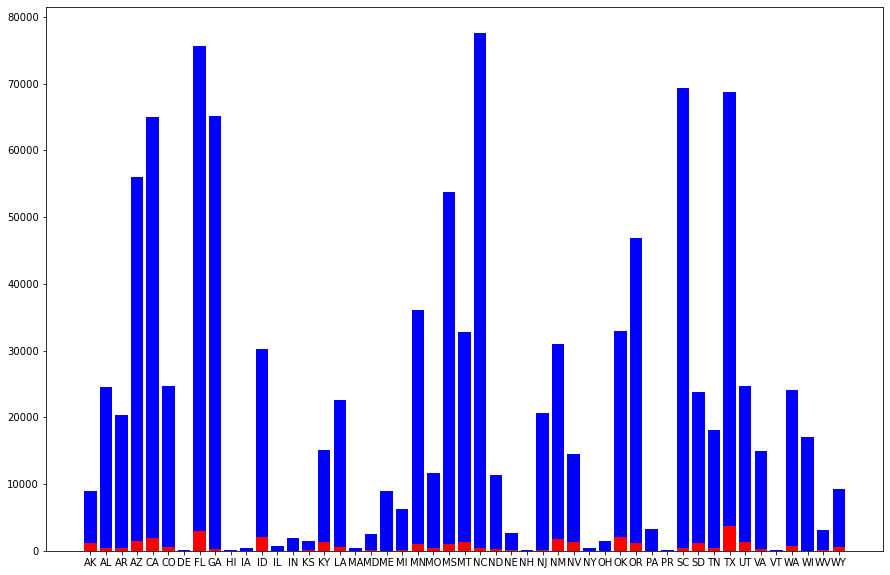

In [11]:
f = f.rename(columns = {'duration_x':'total','duration_y':'large'})
plt.figure(figsize = (15,10))
plt.bar(f['STATE'], f['large'], color='r')
plt.bar(f['STATE'], f['total'], bottom=f['large'], color='b')

In [27]:
df.STAT_CAUSE_DESCR

0           Miscellaneous
1               Lightning
2          Debris Burning
3               Lightning
4               Lightning
                ...      
1048570           Smoking
1048571     Equipment Use
1048572     Equipment Use
1048573    Debris Burning
1048574     Equipment Use
Name: STAT_CAUSE_DESCR, Length: 1048575, dtype: object

<BarContainer object of 13 artists>

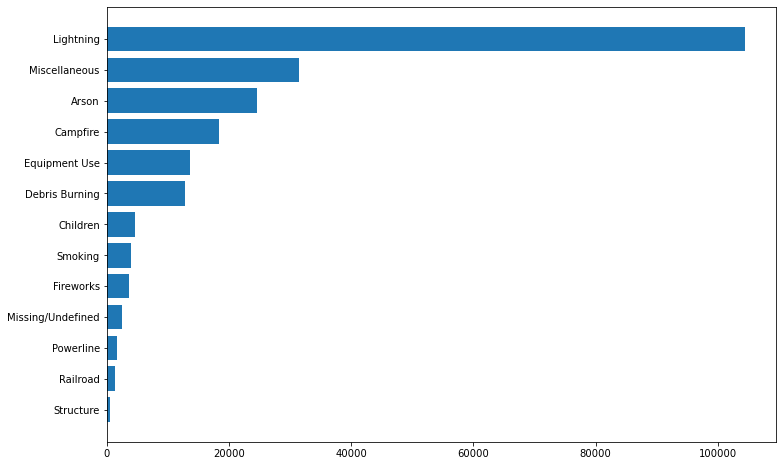

In [21]:
# number of fire cause
cause = df[['STAT_CAUSE_DESCR','FIRE_CODE']].groupby('STAT_CAUSE_DESCR').count().reset_index().sort_values('FIRE_CODE',ascending=True)
plt.figure(figsize = (12,8))
plt.barh(cause['STAT_CAUSE_DESCR'],cause['FIRE_CODE'])

In [ ]:
target_state_fire = df[df['STATE'] == 'CA']

(array([113316.,  60824.,      0.,  16585.,      0.,   4035.,   1592.,
             0.,   2401.,   3044.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

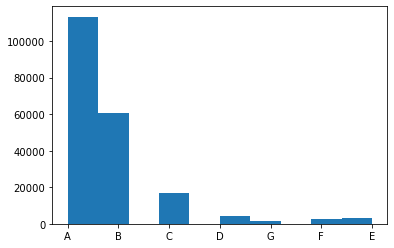

In [29]:
light_fire = df[df['STAT_CAUSE_DESCR'] == 'Lightning']
plt.hist(light_fire['FIRE_SIZE_CLASS'])

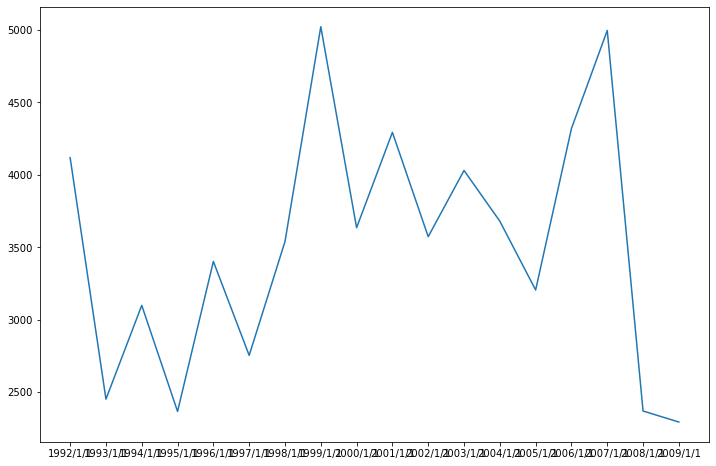

In [39]:
CA_fire = fire[fire['STATE'] == 'CA']
CA_fire_year = pd.DataFrame(CA_fire.groupby('FIRE_YEAR')['duration'].count()).reset_index()
CA_fire_year
plt.figure(figsize = (12,8))
plt.plot(CA_fire_year['FIRE_YEAR'],CA_fire_year['duration'])

In [26]:
#fire_sample=fire.groupby('STATE').filter(lambda x : len(x)>50000)
fire_sample=fire.loc[df['STATE'].isin(['CA','AL','TX','NM','NV'])]
len(fire_sample)


2009

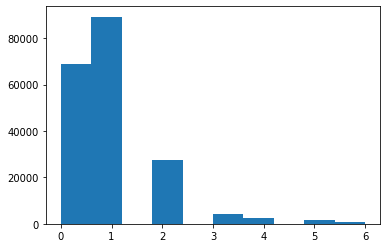

In [ ]:
plt.hist(fire_sample['FIRE_SIZE_CLASS'])
plt.show()

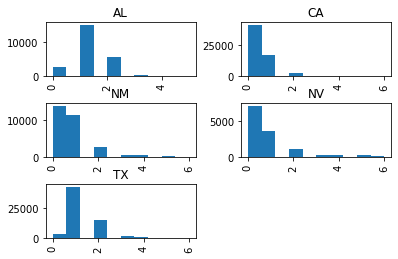

In [ ]:
fire_sample['FIRE_SIZE_CLASS'].hist(by=fire_sample['STATE'])
plt.show()

# Data Visualization

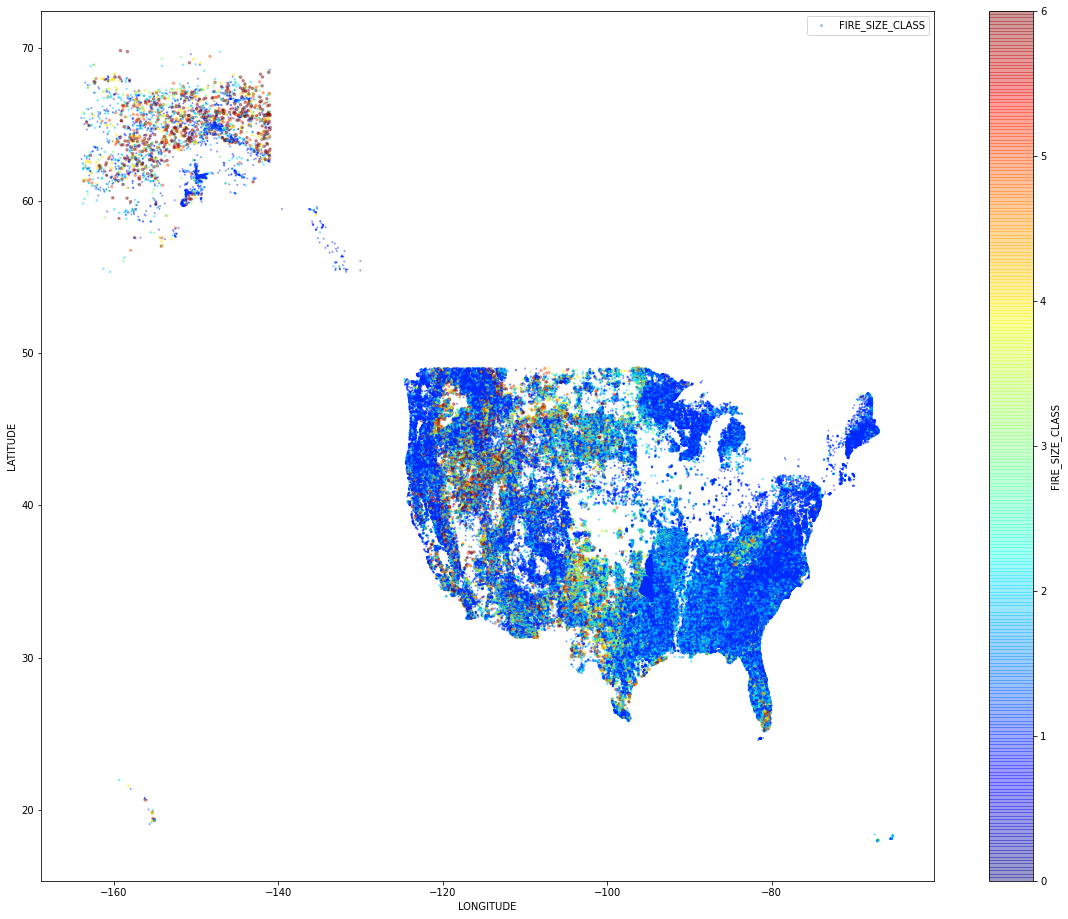

In [ ]:
# Distribution of wildfire in the US
import matplotlib.pyplot as plt
fire.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", s=fire["FIRE_SIZE_CLASS"],label="FIRE_SIZE_CLASS", figsize=(20,16), c="FIRE_SIZE_CLASS",cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False, alpha = 0.4)
plt.legend()
plt.show()

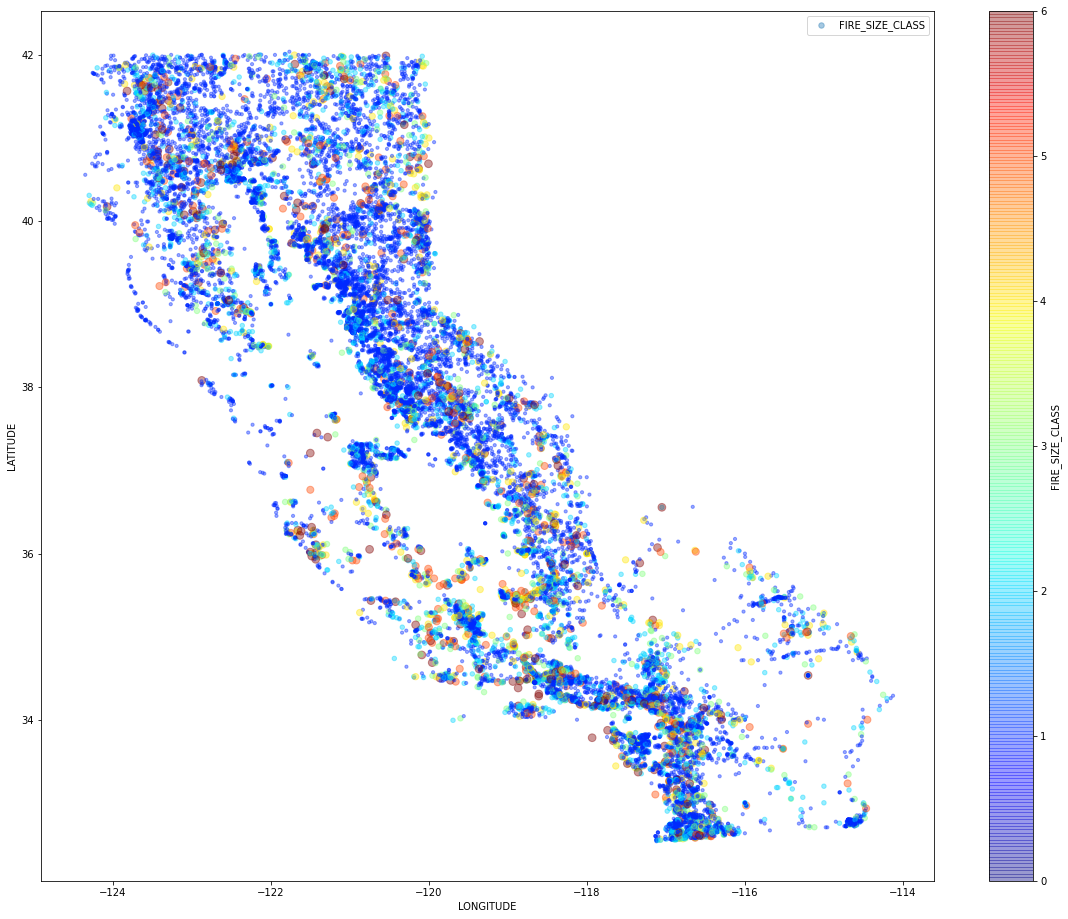

In [ ]:
# Distribution of wildfire in CA
fire_CA = fire[fire['STATE'] == 'CA']
fire_CA.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", s=fire_CA["FIRE_SIZE_CLASS"]*10,label="FIRE_SIZE_CLASS", figsize=(20,16), c="FIRE_SIZE_CLASS",cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False, alpha = 0.4)
plt.legend()
plt.show()

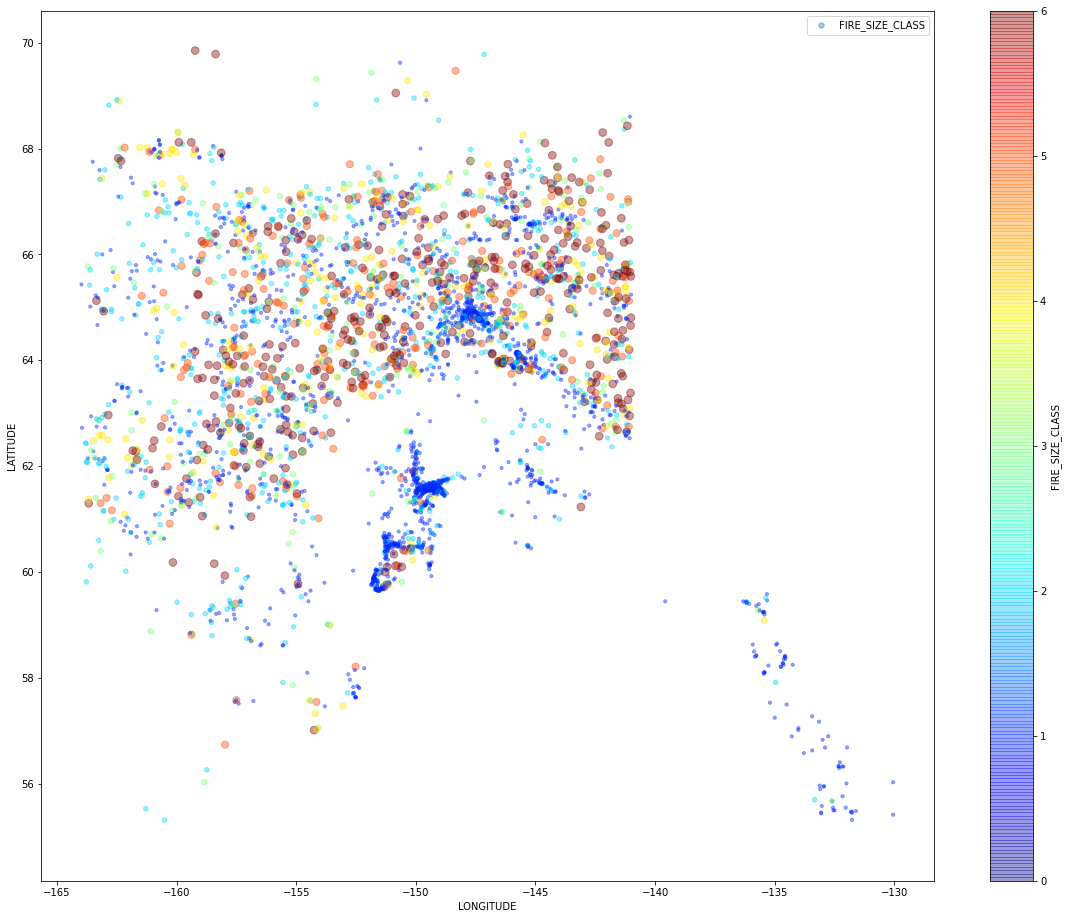

In [ ]:
# Distribution of wildfire in AK
fire_AK = fire[fire['STATE'] == 'AK']
fire_AK.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", s=fire_AK["FIRE_SIZE_CLASS"]*10,label="FIRE_SIZE_CLASS", figsize=(20,16), c="FIRE_SIZE_CLASS",cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False, alpha = 0.4)
plt.legend()
plt.show()

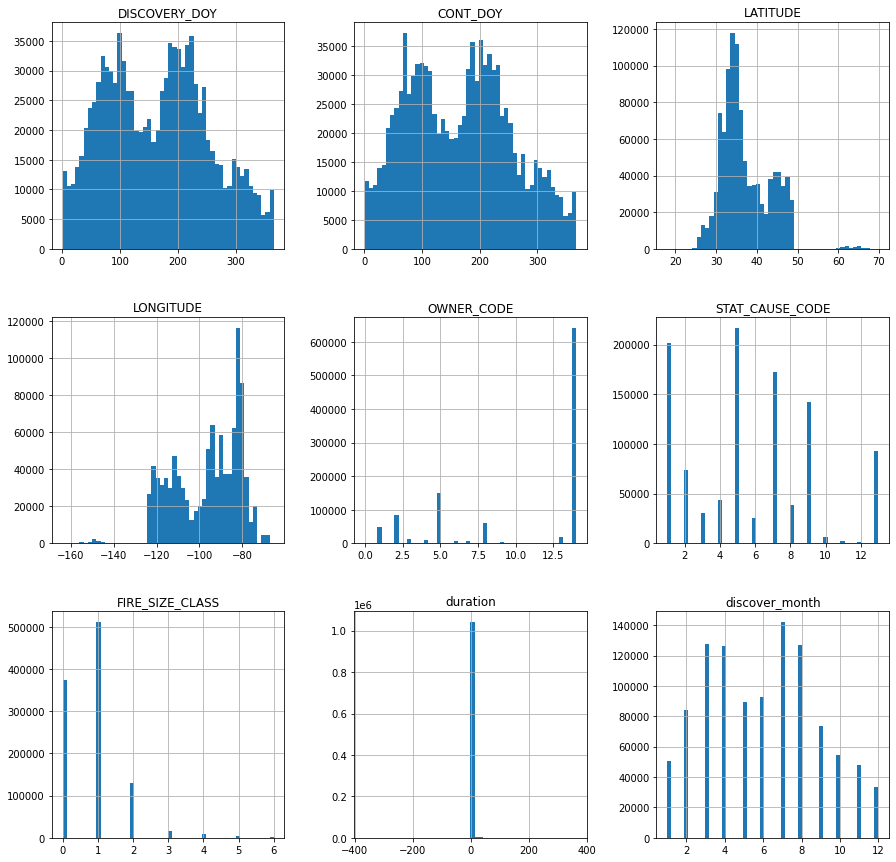

In [ ]:
# histogram for each variable
fire.hist(bins=50, figsize=(15,15))
plt.show()

In [ ]:
# Find the correlation of each variable with fire size
corr_matrix = fire.corr()
corr_matrix['FIRE_SIZE_CLASS'].sort_values(ascending=False)

FIRE_SIZE_CLASS    1.000000
duration           0.161423
OWNER_CODE         0.143096
LONGITUDE          0.140359
STAT_CAUSE_CODE    0.077069
CONT_DOY          -0.092185
DISCOVERY_DOY     -0.101923
discover_month    -0.102313
LATITUDE          -0.157723
Name: FIRE_SIZE_CLASS, dtype: float64

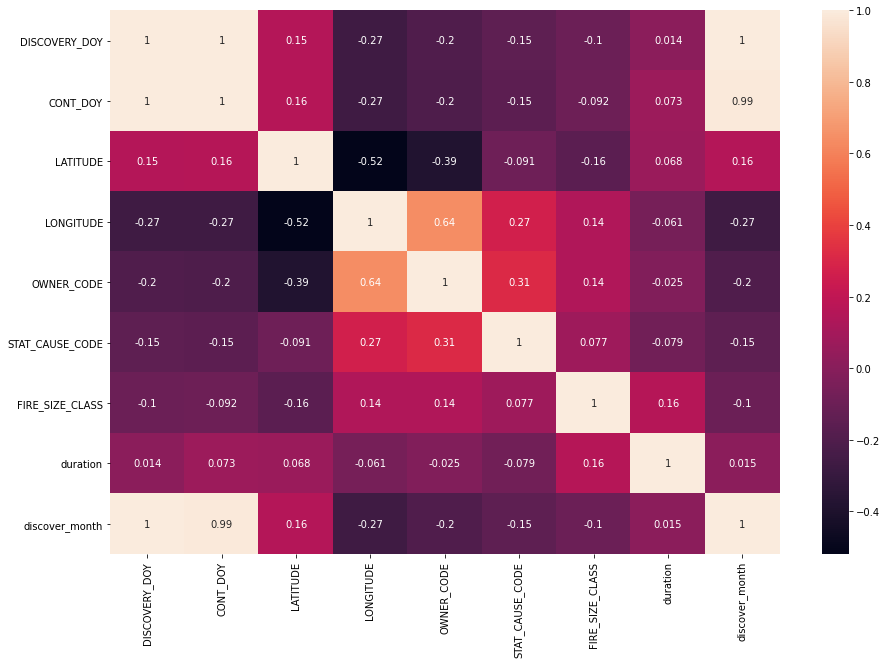

In [ ]:
import seaborn as sn 
plt.figure(figsize=(15, 10))
sn.heatmap(corr_matrix, annot=True)

Weather API

In [ ]:
print(coordinate_to_elevation(43.1359716,-77.6079428))

170.8
